<a href="https://colab.research.google.com/github/AaronYounger/Machine-Learning/blob/main/Neural_Network_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

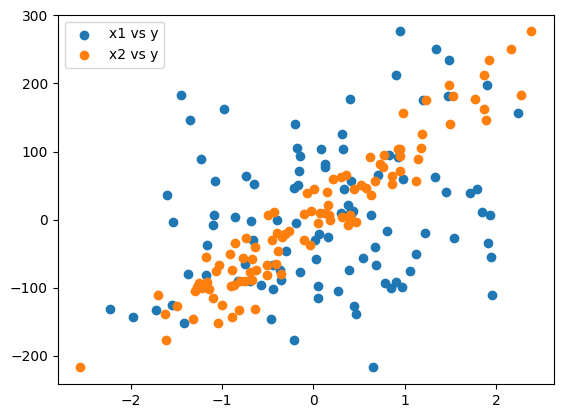

Prediction (100, 1)
RMSE: 103.4330732777988
MAE: 83.6404410054094
R^2: -0.0011908993409837088


In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


X, y = make_regression(
    n_samples = 100,
    n_features=2,
    noise=10,
    random_state = 0
)

y = y.reshape(-1,1)

# Convert to a Dataframe

df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y

plt.scatter(df['x1'], y, label = 'x1 vs y')
plt.scatter(df['x2'], y, label = 'x2 vs y')
plt.legend()
plt.show()

# Create Nueral Network

np.random.seed(123)

x = df[['x1', 'x2']].values
y = df[['y']].values

class Layer_Dense:
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))

  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases
    return self.output

class Activation_ReLU:
  def forward(self, inputs):
    self.output = np.maximum(0, inputs)
    return self.output

# Build Model

layer1 = Layer_Dense(2,5)
aa1 = Activation_ReLU()
layer2 = Layer_Dense(5,3)
aa2 = Activation_ReLU()
layer3 = Layer_Dense(3,1)

# Forward Pass

out1 = layer1.forward(x)
aout1 = aa1.forward(out1)
out2 = layer2.forward(aout1)
aout2 = aa2.forward(out2)
out3 = layer3.forward(aout2)
print("Prediction", out3.shape)

## Calculate Evaluation Metrics Before Training

# Actual vs Predicted
y_true = df[['y']].values
y_pred = out3

# RMSE value
rmse = np.sqrt(np.mean((y_true - y_pred)**2))
print("RMSE:", rmse)

## Mae Value
mae = np.mean(np.abs(y_true - y_pred))
print("MAE:", mae)

## R^2 Value
ss_res = np.sum((y_true - y_pred)**2)
ss_tot = np.sum((y_true- np.mean(y_true))**2)
R2 = 1 - (ss_res / ss_tot)
print("R^2:", R2)










